# [The Ultimate Python Seaborn Tutorial: Gotta Catch 'Em All](https://elitedatascience.com/python-seaborn-tutorial)


In [1]:
# Pandas for managing datasets
import pandas as pd

In [2]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Seaborn for plotting and styling
import seaborn as sns

In [5]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col = 0, encoding = "latin1")

In [6]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [7]:
df.shape

(151, 12)

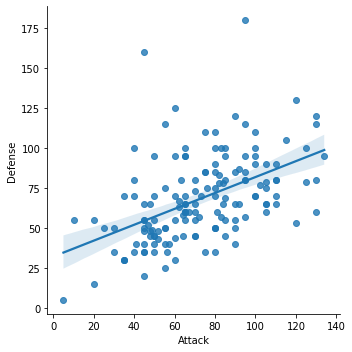

In [10]:
# Scatter plot
sns.lmplot(x = 'Attack', y = 'Defense', data = df)

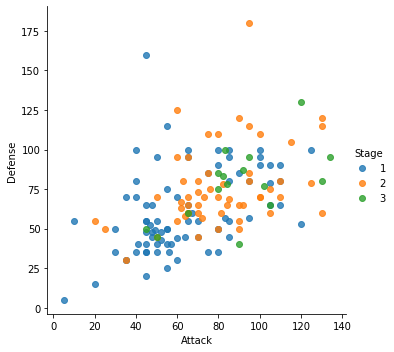

In [15]:
# We will now remove the unintended regression line
# We will also color the points as per their evolution stage
# This method is useful for representing a third dimension in scatter plots
sns.lmplot(x = 'Attack', y = 'Defense', data = df,
          fit_reg = False, # No regression line
          hue = 'Stage')   # Color by evolution stage

(0, 141.9881096001028)

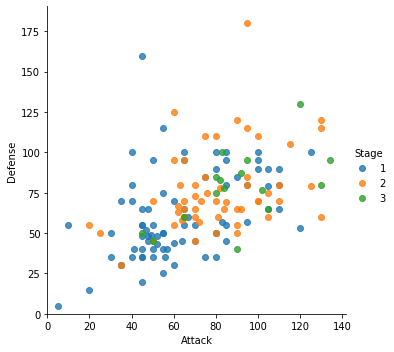

In [18]:
# Modifying range on axes of plots
# Plot using Seaborn
sns.lmplot(x = 'Attack', y = 'Defense', data = df,
          fit_reg = False,
          hue = 'Stage')
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

(-20, 141.9881096001028)

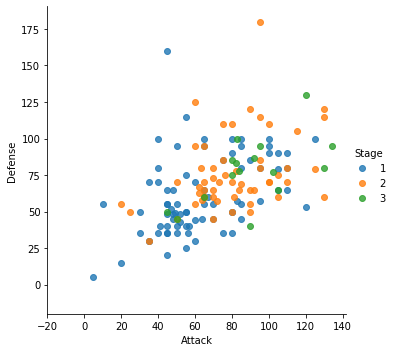

In [21]:
# Modifying range on axes of plots
# Plot using Seaborn
sns.lmplot(x = 'Attack', y = 'Defense', data = df,
          fit_reg = False,
          hue = 'Stage')
# Tweak using Matplotlib
# This is although detrimental to our case here,
# This change has only been shown to demonstrate the behaviour
plt.ylim(-20, None)
plt.xlim(-20, None)

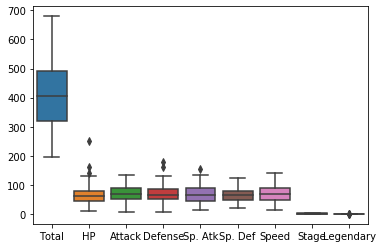

In [23]:
# Boxplot
sns.boxplot(data = df)

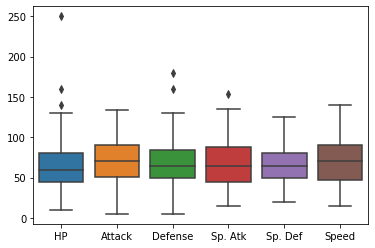

In [24]:
# We remove total since we have individual stats already
# We also remove Stage and Legendary columns because they aren't combat stats

# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis = 1)

# New boxplot using stats_df
sns.boxplot(data = stats_df)

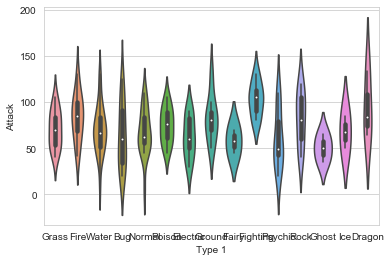

In [25]:
# Set theme
sns.set_style('whitegrid')

# Violin plot
sns.violinplot(x = 'Type 1', y = 'Attack', data = df)

**Color Palettes** <br>
We color the plot as per the colors of the types, as obtained from [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)

In [29]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

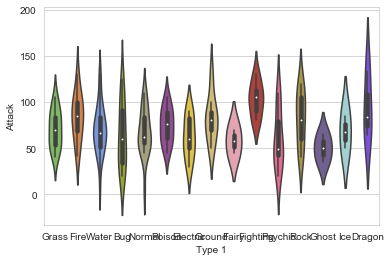

In [30]:
# Violin plot with Pokemon color palette
sns.violinplot(x = 'Type 1', y = 'Attack', data = df,
              palette = pkmn_type_colors) # Set color palette

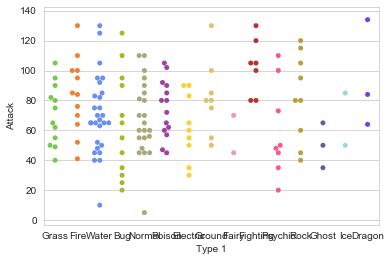

In [31]:
# Since the number of points that we have our less - just 151,
# We can use a swarm plot to visualize the data
# Swarm plot with Pokemon color palette
sns.swarmplot(x = 'Type 1', y = 'Attack', data = df,
             palette = pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

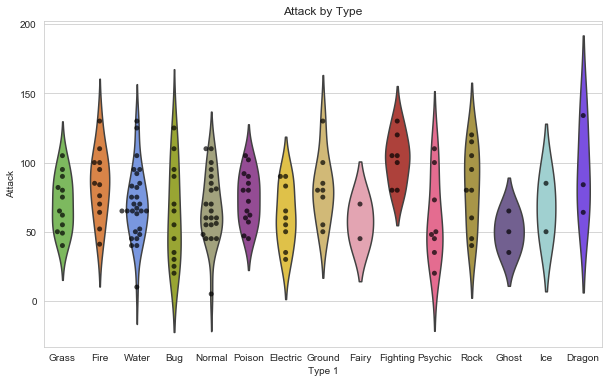

In [32]:
# Overlaying plots
# We try to combine the violin plot and the swarm plot,
# since they display similar information

# Set figure size with matplotlib
plt.figure(figsize = (10, 6))

# Create plot
sns.violinplot(x = 'Type 1',
              y = 'Attack',
              data = df,
              inner = None, # Remove the bars inside the violins
              palette = pkmn_type_colors)

sns.swarmplot(x = 'Type 1',
             y = 'Attack',
             data = df,
             color = 'k', # Make points black
             alpha = 0.7) # and slightly transparent

# Set title with matplotlib
plt.title('Attack by Type')

In [33]:
# Putting it all together
# We want to display all the stats together in a plot
# For that, we have to do some data wrangling
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [34]:
# Our stats at present are in different columns
# We want to melt them into one column
# Melt DataFrame
melted_df = pd.melt(stats_df,
                   id_vars = ["Name", "Type 1", "Type 2"], # Variables
                   var_name = "Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [35]:
# Now, each pokemon has 6 different rows for 6 different stats
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


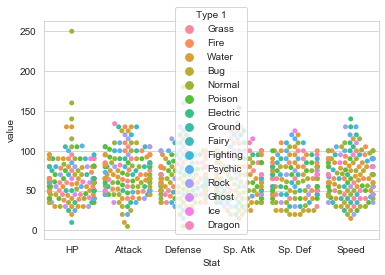

In [37]:
# Swarmplot with melted_df
sns.swarmplot(x = 'Stat', y = 'value', data = melted_df,
             hue = 'Type 1')

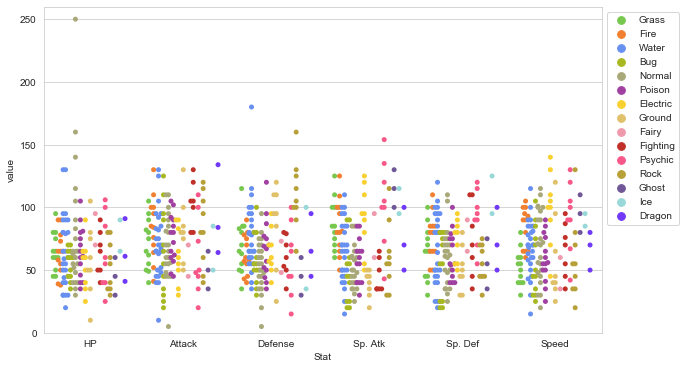

In [39]:
# Let's make the chart readable
# 1. Enlarge the plot
plt.figure(figsize = (10, 6))

sns.swarmplot(x = 'Stat',
             y = 'value',
             data = melted_df,
             hue = 'Type 1',
             dodge = True, # 2. Separate points by hue
             palette = pkmn_type_colors) # 3. Use Pokemon palette

# 4. Adjust the y-axis
plt.ylim(0, 260)

# 5. Place legend to the right
plt.legend(bbox_to_anchor = (1, 1), loc = 2)

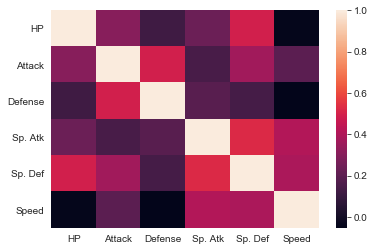

In [40]:
# Calculate correlations
corr = stats_df.corr()

# Heatmap
sns.heatmap(corr)

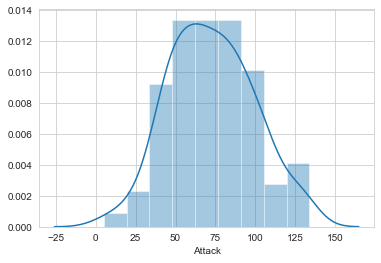

In [41]:
# Distribution plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

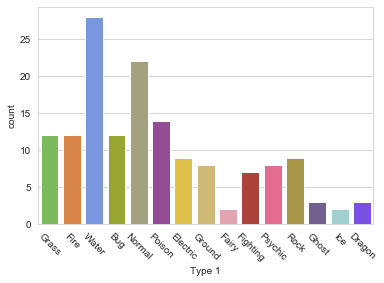

In [42]:
# Count plot (a.k.a. Bar Plot)
sns.countplot(x = 'Type 1', data = df, palette = pkmn_type_colors)

# Rotate x-labels
plt.xticks(rotation = -45)

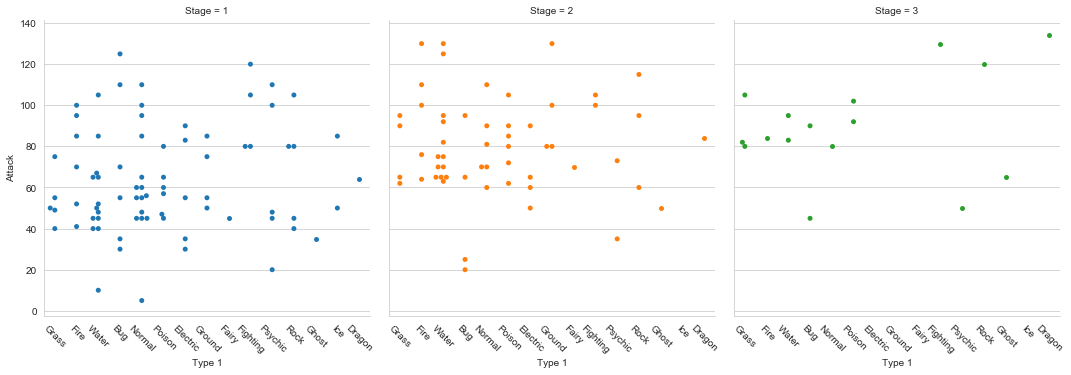

In [45]:
# Cat Plot
g = sns.catplot(x = 'Type 1',
                  y = 'Attack',
                  data = df,
                  hue = 'Stage',  # Color by stage
                  col = 'Stage',  # Separate by stage
                  kind = 'swarm') # Swarmplot

# Rotate x-axis labels
g.set_xticklabels(rotation = -45)

# Doesn't work because only rotates last plot
# plt.xticks(rotation = -45)

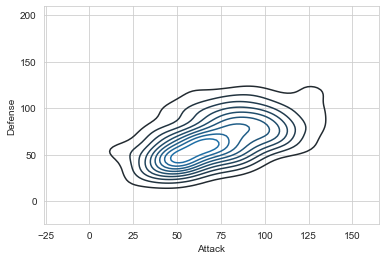

In [47]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

Text(0.5, 1, 'Attack vs Defense')

<Figure size 720x432 with 0 Axes>

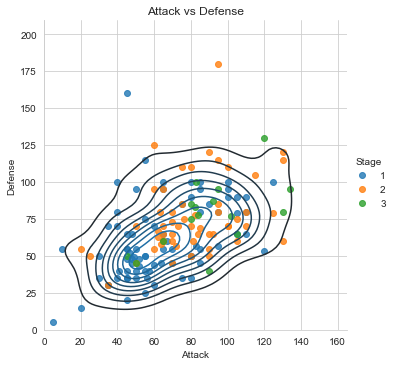

In [50]:
# Overlayed Density and Scatter Plots
plt.figure(figsize = (10, 6))

sns.lmplot(x = 'Attack', y = 'Defense', data = df,
          fit_reg = False,
          hue = 'Stage')

sns.kdeplot(df.Attack, df.Defense)

plt.ylim(0, None)
plt.xlim(0, None)
plt.title('Attack vs Defense')

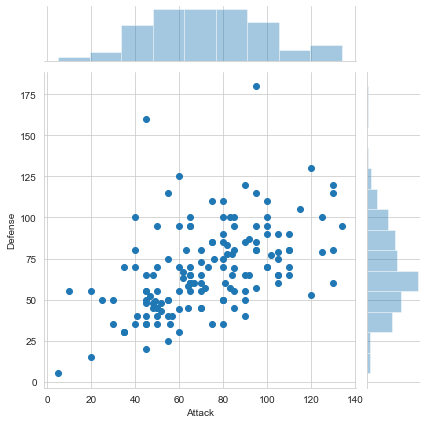

In [51]:
# Joint Distribution Plot
# Combine information from scatter plots and histograms
# give detailed information for bi-variate distributions
sns.jointplot(x = 'Attack', y = 'Defense', data = df)